**Assignment 4: Linear Regression**


**Prediction of Plant Output Energy (PE) based on Ambient Temperature (AT)**

**Import Dependencies**

Here all the necessary libraries and dependencies that will be used have been imported.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Mount Google Drive**

Mouting the google drive because dataset has been uploaded on google drive. So need access to that dataset on google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Dataset**

The used here is downloaded from UCI machine learning datasets. The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)  of the plant. The dataset is publicly available at:
[Dataset Link](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

In [ ]:
file = '/content/drive/MyDrive/Folds5x2_pp.xlsx'
df = pd.read_excel(file)

In [ ]:
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


**Define X and Y for Linear Regression**

In this project only ambient variable temperature (AT) is taken into consideration for the prediction of plant energy (PE).

In [ ]:
X=df['AT'].values
Y=df['PE'].values

**Plot this data**

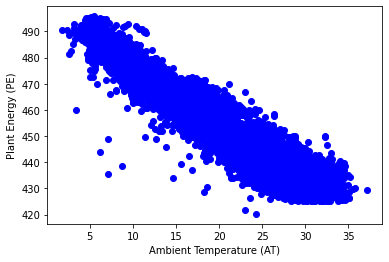

In [ ]:
plt.scatter(X,Y, color='blue')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Plant Energy (PE)')
plt.show()

**Linear Regression Model from Scratch**

Initially, linear regression model is build from scratch using the concepts studied during the Linear Regression lecture.

In [ ]:
# Mean X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [ ]:
# Total number of values
m=len(X)

In [ ]:
# Calculate co-efficients
num=0
den=0
for i in range(m):
  num += (X[i]-mean_x)*(Y[i]-mean_y)
  den += (X[i]-mean_x)**2
  b1=num/den
  b0=mean_y-(b1*mean_x)

In [ ]:
print(b1,b0)

-2.17131995851779 497.0341198927667


In [ ]:
# Plotting values and regression line
max_x =np.max(X)
min_x =np.min(X)
print(max_x,min_x)

37.11 1.81


In [ ]:
# Calculating line values x and y
x=np.linspace(min_x,max_x,10)
y=b0+b1*x

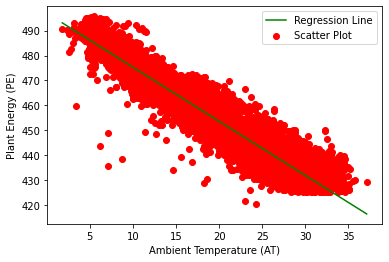

In [ ]:
# Plotting lines
plt.plot(x,y,color='green',label='Regression Line')
plt.scatter(X,Y,c='red',label='Scatter Plot')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Plant Energy (PE)')
plt.legend()
plt.show()

**R2 Score Calculation**

In [ ]:
ss_t=0
ss_r=0
for i in range(m):
  y_pred=b0+b1*X[i]
  ss_t += (Y[i]-mean_y)**2
  ss_r += (Y[i]-y_pred)**2
  r2=1-(ss_r/ss_t)

In [ ]:
print('R2',r2)

R2 0.8989475964148234


**Linear Regression using Sci-kit learn ML linear regression model**

Split dataset into training and testing

In [ ]:
#Splitting the data into Train and Test'
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

**Model Training**

In [ ]:
#Training the model using X_train, Y_train
model = LinearRegression()
model.fit(X_train.reshape(-1,1),Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction**

In [ ]:
#Predicting using the trained model - X_test
Y_pred=model.predict(X_test.reshape(-1,1))

In [ ]:
print(Y_test) #Test data - actual data
print(Y_pred) #Model predicted dataset

[431.23 460.01 461.14 ... 468.9  473.9  437.07]
[434.8051798  459.06628002 464.75179725 ... 468.63617734 476.64364244
 441.16341089]


**Plot original test data and predicted test data**

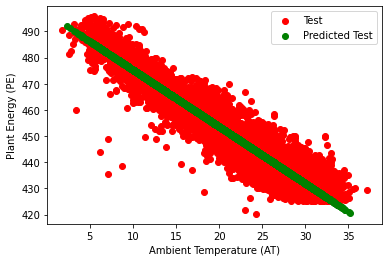

In [ ]:
plt.scatter(X_train,Y_train, color='red',label='Test')
plt.scatter(X_test,Y_pred,color='green',label='Predicted Test')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Plant Energy (PE)')
plt.legend()
plt.xticks()
plt.yticks()
plt.show()

**Intercept and Coefficient Calculations**

In [ ]:
print('Intercept', model.intercept_)
print('Coefficient', model.coef_)
print(model.coef_,'x +',model.intercept_)

Intercept 496.9986621359152
Coefficient [-2.17004474]
[-2.17004474] x + 496.9986621359152


**Calculate RMSE and R2 score**

In [ ]:
# model evaluation
rmse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Root Mean Square Error', rmse)
print('R2 Score', r2)

# Calculate and display accuracy
accuracy = 100 - np.mean(rmse)
print('Accuracy:', round(accuracy, 2), '%.')

Root Mean Square Error 28.086491250245533
R2 Score 0.9042343666907064
Accuracy: 71.91 %.
